In [1]:
import os
import sys
import requests
from datetime import datetime 
from multiprocessing import Pool
import numpy as  np
import pandas as pd
from pathlib import Path
import pickle
from tqdm import tqdm
from time import time
from typing import Dict, List, Optional
sys.path.append('../')
sys.path.append('../anmodel')
import matplotlib.pyplot as plt
import anmodel
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'

In [3]:
V=np.linspace(-100,50,10000)

In [13]:
anav=[]
aunav0=[]
aunav1=[]
anap=[]

x0=6
x1=12

def mnap(v):
    aaa1aaa1=1/(1+np.exp(-(v+55.7)/7.7))
    return aaa1aaa1**3

def mnav(v):
    a=0.1*(v+33)/(1-np.exp(-(v+33)/10))
    b=4*np.exp(-(v+53.7)/12)
    return (a/(a+b))**3

def munav0(v):
    a=0.1*(v+33+x0)/(1-np.exp(-(v+33+x0)/10))
    b=4*np.exp(-(v+53.7+x0)/12)
    return (a/(a+b))**3
    
def munav1(v):
    a=0.1*(v+33+x1)/(1-np.exp(-(v+33+x1)/10))
    b=4*np.exp(-(v+53.7+x1)/12)
    return (a/(a+b))**3
       

In [14]:
for i in range(10000):
    anav.append(mnav(V[i]))
    anap.append(mnap(V[i]))
    aunav0.append(munav0(V[i]))
    aunav1.append(munav1(V[i]))

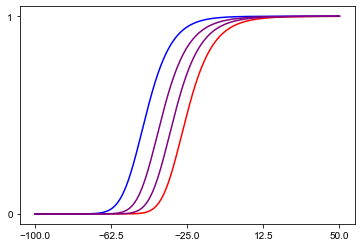

In [19]:
fig=plt.figure()
ax = fig.add_subplot(111)
Z=np.linspace(-100,50,5)
ax.set_xticks(Z)
Z=np.linspace(0,1,2)
ax.set_yticks(Z)
plt.plot(V,anav, color="red")
plt.plot(V,anap, color="blue")
plt.plot(V,aunav0, color="purple")
plt.plot(V,aunav1, color="purple")
plt.savefig("Fig1B1.pdf")

In [28]:
def hnav(v):
    ah=0.07*np.exp(-(v+50)/10)
    bh=1/(1+np.exp(-(v+20)/10))
    return ah/(ah+bh)
y0=-10
y1=-30

def unavh0(v):
    ah=0.07*np.exp(-(v+50+y0)/10)
    bh=1/(1+np.exp(-(v+20+y0)/10))
    return ah/(ah+bh)
    
def unavh1(v):
    ah=0.07*np.exp(-(v+50+y1)/10)
    bh=1/(1+np.exp(-(v+20+y1)/10))
    return ah/(ah+bh)

In [29]:
inav=[]
iunav0=[]
iunav1=[]
inap=[]
for i in range(10000):
    inav.append(hnav(V[i]))
    inap.append(1.0)
    iunav0.append(unavh0(V[i]))
    iunav1.append(unavh1(V[i]))


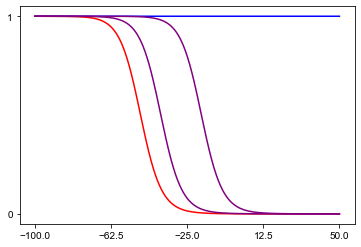

In [30]:
fig=plt.figure()
ax = fig.add_subplot(111)
Z=np.linspace(-100,50,5)
ax.set_xticks(Z)
Z=np.linspace(0,1,2)
ax.set_yticks(Z)
plt.plot(V,inav, color="red")
plt.plot(V,inap, color="blue")
plt.plot(V,iunav0, color="purple")
plt.plot(V,iunav1, color="purple")
plt.savefig("Fig1B2.pdf")